In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [4]:
# informações gerais sobre cada pedido
pedido = pd.read_csv('olist_orders_dataset.csv')
# produtos comprados em cada pedido
itens_pedido = pd.read_csv('olist_order_items_dataset.csv')
# características físicas e descritivas dos produtos
produto = pd.read_csv('olist_products_dataset.csv')

In [5]:
# Juntar os dataset para uma analise mais eficiente.
df = pedido.merge(itens_pedido, on="order_id", how="left")
df = df.merge(produto, on="product_id", how="left")

In [6]:
print(pedido.columns)
print(itens_pedido.columns)
print(produto.columns)


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')



# order_id - id_pedido
# customer_id - id_cliente
# order_status - status_pedido
# order_purchase_timestamp - data_hora_compra
# order_approved_at - data_hora_aprovacao
# order_delivered_carrier_date - data_entrega_transportadora
# order_delivered_customer_date - data_entrega_cliente
# order_estimated_delivery_date - data_estimada_entrega
# order_item_id - id_item_pedido
# product_id - id_produto
# seller_id - id_vendedor
# shipping_limit_date - data_limite_envio
# price - preco
# freight_value - valor_frete
# product_category_name - nome_categoria_produto
# product_name_lenght - tamanho_nome_produto (erro de digitação no original: lenght)
# product_description_lenght - tamanho_descricao_produto
# product_photos_qty - quantidade_fotos_produto
# product_weight_g - peso_produto_gramas
# product_length_cm - comprimento_produto_cm
# product_height_cm - altura_produto_cm
# product_width_cm - largura_produto_cm


In [7]:
# Analise exploratória dos dados(EDA)
# 5 Primeiras linhas do dataset
print("Dados: ")
df.head()

Dados: 


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [8]:
# Infomações Gerais
print("Informações do dataset: ")
df.info()

Informações do dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_approved_at              113264 non-null  object 
 5   order_delivered_carrier_date   111457 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  113425 non-null  object 
 8   order_item_id                  112650 non-null  float64
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price

In [9]:
# Estatísticas descritivas
print("Estatísticas dos dados: ")
df.describe()



Estatísticas dos dados: 


,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650.000000,112650.000000,112650.000000,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000
mean,1.197834,120.653739,19.990320,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546
std,0.705124,183.633928,15.806405,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.990000,16.260000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.150000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Preço medio de produtos de: R$120.65.

Os produtos na maioria das vezes, são apenas 1 item, chegando até 21 itens.

Noto também grande variedade de peso e dimensões.

In [10]:
# Selecionar apenas as colunas numéricas.
numerica_df = df.select_dtypes(include=['float64', 'int64'])
corr = numerica_df.corr()
corr

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
order_item_id,1.000000,-0.060522,-0.029380,-0.022662,-0.014311,-0.055852,-0.003549,0.005628,0.029323,-0.010732
price,-0.060522,1.000000,0.414204,0.017001,0.198166,0.051848,0.338819,0.145811,0.223602,0.172467
freight_value,-0.029380,0.414204,1.000000,0.023611,0.093855,0.022259,0.610420,0.309086,0.391831,0.323777
product_name_lenght,-0.022662,0.017001,0.023611,1.000000,0.091524,0.145904,0.022731,0.060447,-0.028170,0.064442
product_description_lenght,-0.014311,0.198166,0.093855,0.091524,1.000000,0.118087,0.059710,0.005971,0.072724,-0.068419
product_photos_qty,-0.055852,0.051848,0.022259,0.145904,0.118087,1.000000,0.022667,0.047503,-0.033399,0.010367
product_weight_g,-0.003549,0.338819,0.610420,0.022731,0.059710,0.022667,1.000000,0.460919,0.583277,0.506609
product_length_cm,0.005628,0.145811,0.309086,0.060447,0.005971,0.047503,0.460919,1.000000,0.192895,0.532537
product_height_cm,0.029323,0.223602,0.391831,-0.028170,0.072724,-0.033399,0.583277,0.192895,1.000000,0.281224
product_width_cm,-0.010732,0.172467,0.323777,0.064442,-0.068419,0.010367,0.506609,0.532537,0.281224,1.000000


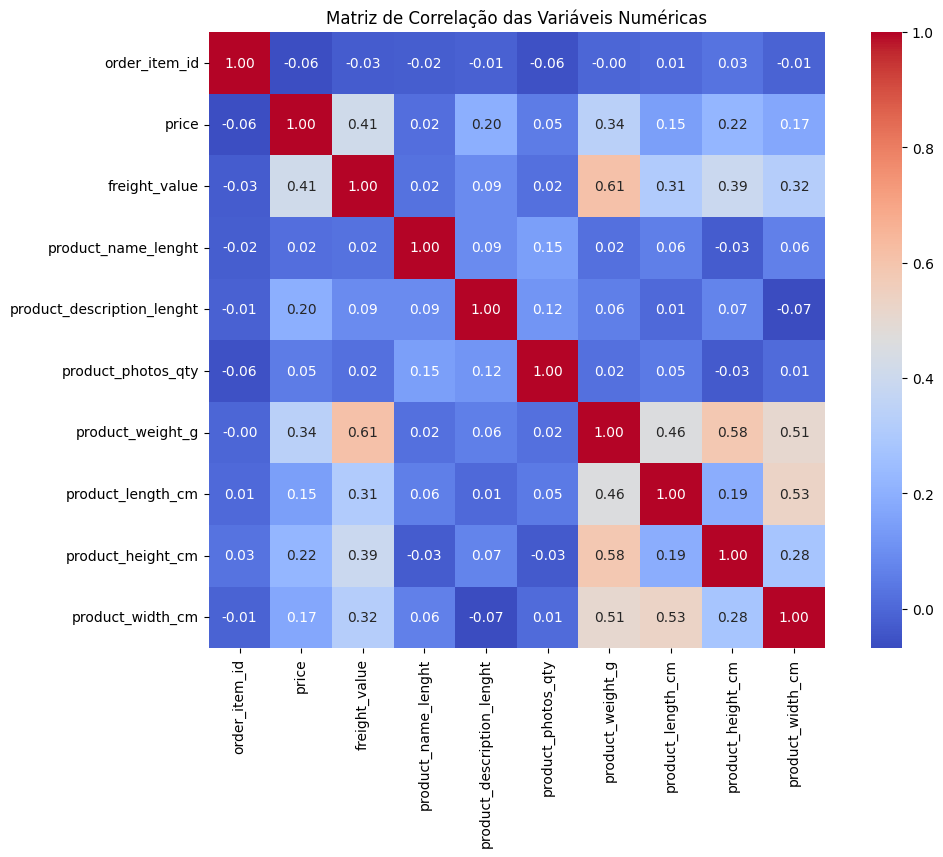


 INSIGHTS DA CORRELAÇÃO:
 product_weight_g possui forte correlação com freight_value (0.61)
 Produtos mais pesados têm fretes mais altos

 Dimensões (height, length, width) correlacionam com freight_value (0.31-0.39)
 Volume físico impacta custo logístico

 Preço possui baixa correlação com dimensões e peso
 Preço não depende principalmente do tamanho do produto


In [11]:
# Heatmap mostrando as correlações das colunas numericas.
# O heatmap vai ajuda a ver visualmente relações entre variáveis
# Cores quentes (vermelho) = correlação positiva forte
# Cores frias (azul) = correlação negativa forte
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

print("\n INSIGHTS DA CORRELAÇÃO:")
print(" product_weight_g possui forte correlação com freight_value (0.61)")
print(" Produtos mais pesados têm fretes mais altos")
print("\n Dimensões (height, length, width) correlacionam com freight_value (0.31-0.39)")
print(" Volume físico impacta custo logístico")
print("\n Preço possui baixa correlação com dimensões e peso")
print(" Preço não depende principalmente do tamanho do produto")


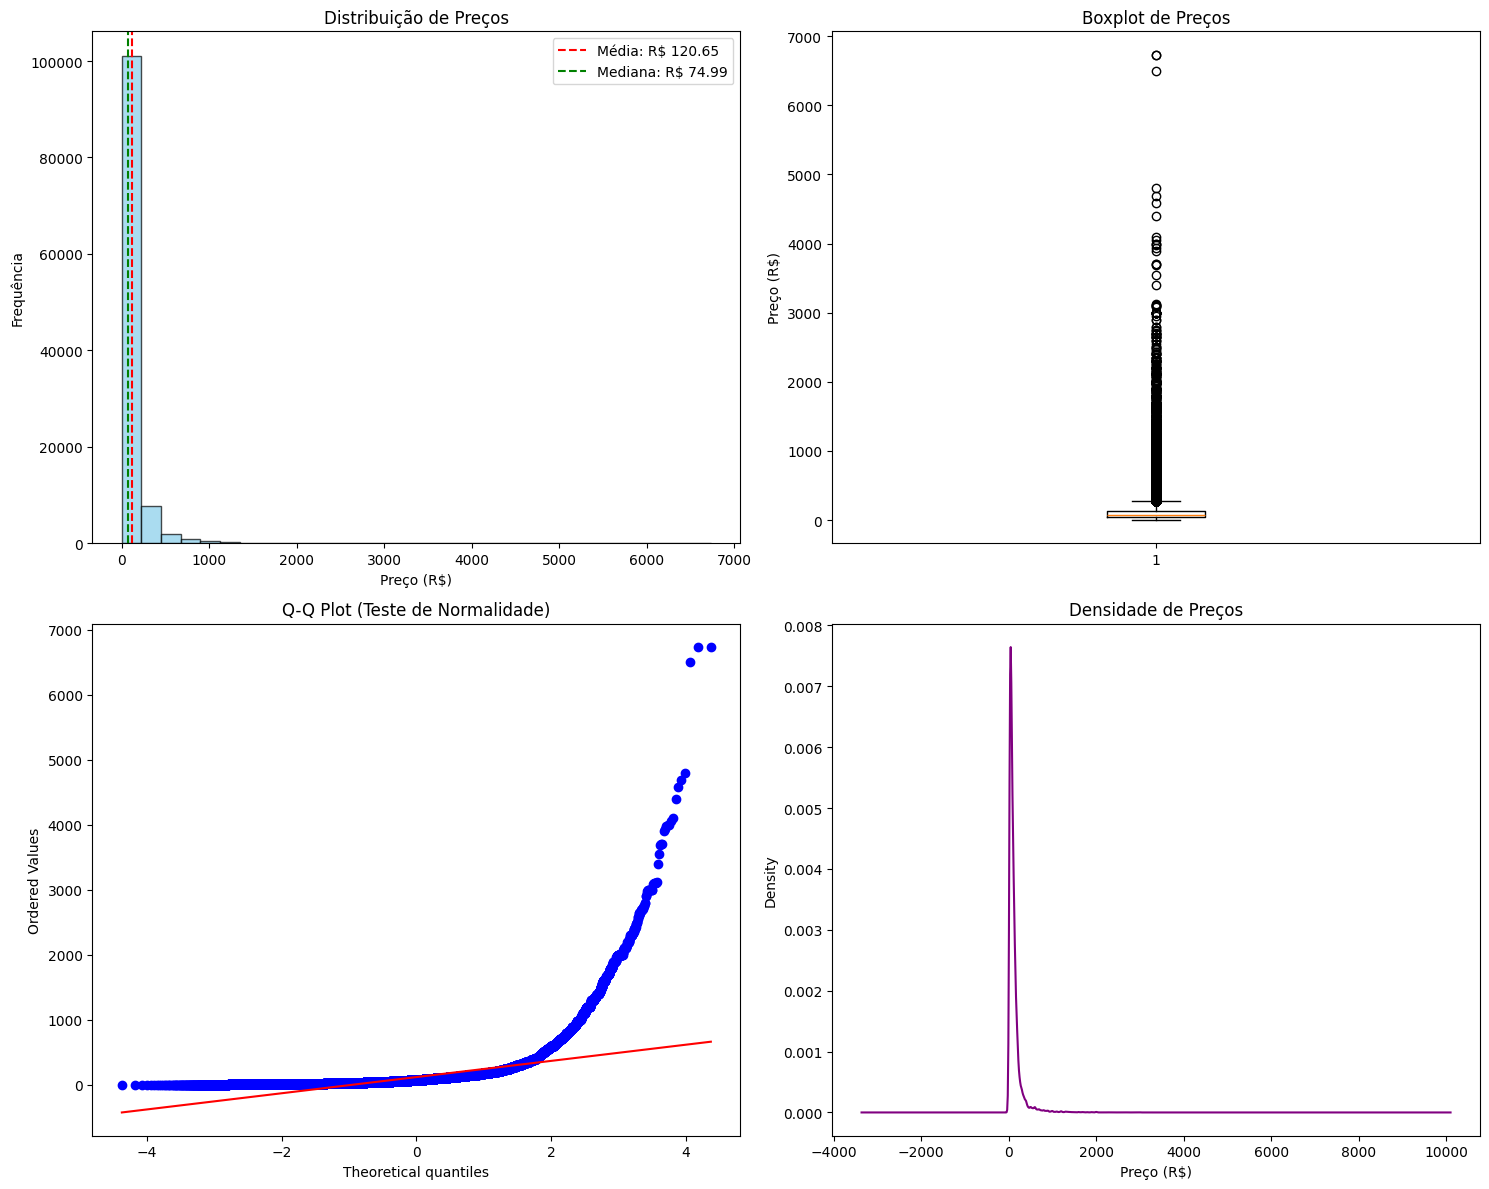


 INSIGHTS DA DISTRIBUIÇÃO DE PREÇOS:
 Preço médio: R$ 120.65
 Mediana de preço: R$ 74.99
 Distribuição assimétrica positiva (cauda longa à direita)
 Muitos produtos baratos e poucos extremamente caros


In [12]:
# Criando visualizações para as estatísticas descritivas
# utilizando a coluna de preço
# Entender a distribuição de preços ajuda a identificar
# padrões de precificação e possíveis outliers.
if 'price' in df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Histograma
    axes[0, 0].hist(df['price'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].axvline(df['price'].mean(), color='red', linestyle='--', label=f'Média: R$ {df["price"].mean():.2f}')
    axes[0, 0].axvline(df['price'].median(), color='green', linestyle='--', label=f'Mediana: R$ {df["price"].median():.2f}')
    axes[0, 0].set_title('Distribuição de Preços')
    axes[0, 0].set_xlabel('Preço (R$)')
    axes[0, 0].set_ylabel('Frequência')
    axes[0, 0].legend()

    # Boxplot
    axes[0, 1].boxplot(df['price'].dropna())
    axes[0, 1].set_title('Boxplot de Preços')
    axes[0, 1].set_ylabel('Preço (R$)')

    # Q-Q Plot para verificar normalidade
    stats.probplot(df['price'].dropna(), dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title('Q-Q Plot (Teste de Normalidade)')

    # Densidade
    df['price'].dropna().plot(kind='density', ax=axes[1, 1], color='purple')
    axes[1, 1].set_title('Densidade de Preços')
    axes[1, 1].set_xlabel('Preço (R$)')

    plt.tight_layout()
    plt.show()

    print("\n INSIGHTS DA DISTRIBUIÇÃO DE PREÇOS:")
    print(f" Preço médio: R$ {df['price'].mean():.2f}")
    print(f" Mediana de preço: R$ {df['price'].median():.2f}")
    print(" Distribuição assimétrica positiva (cauda longa à direita)")
    print(" Muitos produtos baratos e poucos extremamente caros")

A distribuição é assimétrica positiva (cauda longa à direita),
pois há muitos produtos baratos e poucos extremamente caros.

In [13]:
# Identificar valores duplicatas
print(f"Quantidade de duplicatas: ")
df.duplicated().sum()

Quantidade de duplicatas: 


np.int64(0)

Não possui duplicatas

In [14]:
# Identificando valore com inconsistência
# Motivo: Valores impossíveis ou inválidos (preços negativos,
# pesos zerados, etc) precisam ser identificados e tratados
print("Preço negativos ou zerados :", df[df['price'] <= 0].shape[0]) # preços negativos, ou zerados.
print("Frete negativos ou zerados 0 :", df[df['freight_value'] < 0].shape[0]) # frete negativos, ou fretes com 0 que se consideram como grátis.
print("Peso com 0 :", df[df['product_weight_g'] == 0].shape[0]) # peso igual a 0. Todo produto fisico vai ter um peso.



Preço negativos ou zerados : 0
Frete negativos ou zerados 0 : 0
Peso com 0 : 8


In [15]:
# Tratamento para as inconsistências.
# Por se tratar de apenas 8 registro, a melhor opção vai ser remover os próprios, já que não vai afetar em nda.
df = df[df['product_weight_g'] > 0]

print("\nVerificação da inconsistência após o tratamento: ")
print("Peso == 0 :", df[df['product_weight_g'] == 0].shape[0])


Verificação da inconsistência após o tratamento: 
Peso == 0 : 0


In [16]:

# Verificando valores nulos no dataset.
print("Contagem de valores nulos por coluna:")
valores_nulos = df.isnull().sum()
percentual_nulos = (df.isnull().sum() / len(df)) * 100

resultado_nulos = pd.DataFrame({
    'Valores_Nulos': valores_nulos,
    'Percentual': percentual_nulos
})

# Ordenar por quantidade de valores nulos
resultado_nulos = resultado_nulos.sort_values('Valores_Nulos', ascending=False)
print(resultado_nulos)

# Total de valores nulos no dataset
total_nulos = df.isnull().sum().sum()
total_valores = df.size
percentual_total_nulos = (total_nulos / total_valores) * 100

print(f"\nTotal de valores nulos no dataset: {total_nulos}")
print(f"Percentual total de valores nulos: {percentual_total_nulos:.2f}%")

Contagem de valores nulos por coluna:
                               Valores_Nulos  Percentual
order_delivered_customer_date           2454    2.178932
product_description_lenght              1586    1.408226
product_category_name                   1586    1.408226
product_name_lenght                     1586    1.408226
product_photos_qty                      1586    1.408226
order_delivered_carrier_date            1194    1.060165
order_approved_at                         15    0.013319
order_purchase_timestamp                   0    0.000000
order_id                                   0    0.000000
customer_id                                0    0.000000
order_status                               0    0.000000
order_estimated_delivery_date              0    0.000000
order_item_id                              0    0.000000
product_id                                 0    0.000000
freight_value                              0    0.000000
price                                      0    0.

Comparado com o tamanho do dataset, essa quantidade de 10007 mil nulos, é bem pouco.

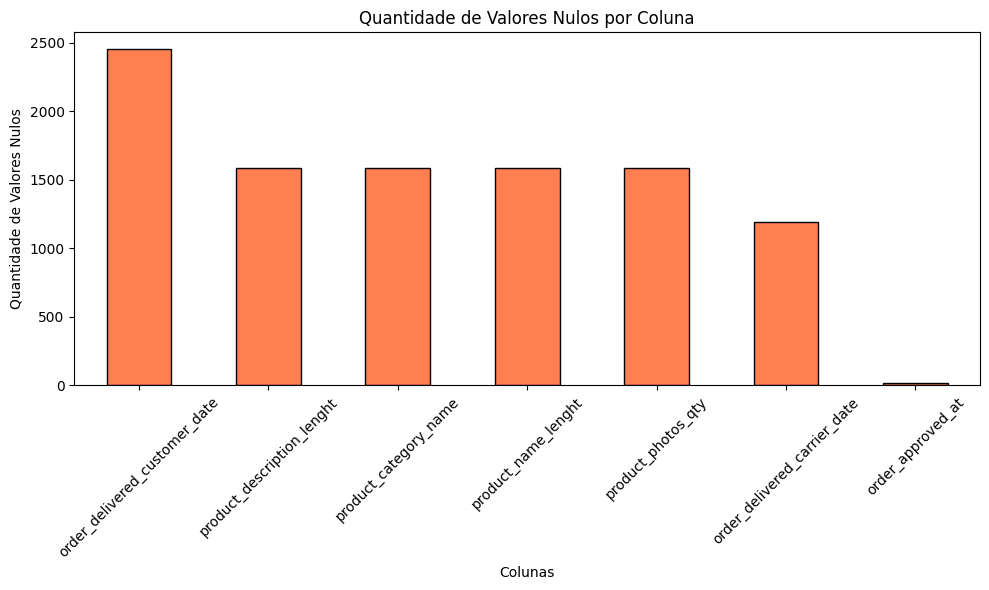

In [17]:
# Gráfico de barras, valores nulos por coluna
colunas_com_nulos = resultado_nulos[resultado_nulos['Valores_Nulos'] > 0]
if not colunas_com_nulos.empty:
        plt.figure(figsize=(10, 6))
        colunas_com_nulos['Valores_Nulos'].plot(kind='bar', color='coral', edgecolor='black')
        plt.title('Quantidade de Valores Nulos por Coluna')
        plt.xlabel('Colunas')
        plt.ylabel('Quantidade de Valores Nulos')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
else:
    print("Não há valores nulos no dataset para visualizar.")

In [18]:
# Tratamento de valores nulos
# Tratando colunas Categóricas
# 'product_category_name' - categoria do produto.
# Produtos sem a categoria, vão ser preenchido com desconhecido.
nulos_antes_cat = df['product_category_name'].isnull().sum()
df['product_category_name'] = df['product_category_name'].fillna('desconhecido')
nulos_depois_cat = df['product_category_name'].isnull().sum()


# Tratando colunas Numéricas
# Por se tratar de tamanho ou quantidade, vão ser preenchido com 0.
# Zero representa 'não possui'.
cols_zero = [
    'product_description_lenght',
    'product_name_lenght',
    'product_photos_qty'
]

for col in cols_zero:
    nulos_antes = df[col].isnull().sum()
    df[col] = df[col].fillna(0)
    nulos_depois = df[col].isnull().sum()
    print(f"    {col}: {nulos_antes} - {nulos_depois}")


# Tratando colunas de Dimensões
# Colunas como (peso,altura,largura, etc...)
# Devido a esses dados ser contínuos e contém outliers, serão preenchidos com a mediana, por ser mais recomendada para outliers.
size_cols = [
    'product_width_cm',
    'product_height_cm',
    'product_length_cm',
    'product_weight_g'
]

for col in size_cols:
    nulos_antes = df[col].isnull().sum()
    mediana = df[col].median()
    df[col] = df[col].fillna(mediana)
    nulos_depois = df[col].isnull().sum()
    print(f"   {col}: {nulos_antes} - {nulos_depois} (mediana: {mediana:.2f})")



# Remoção de valores

# Para um pedido ser feito, depende dessas colunas('product_id', 'seller_id' e 'price') que é base praticamente.
# Com isso, se esses valores estão nulos, não tem um pedido completo.
# Então, a remoção não vai afetar em nada.
df.dropna(
    subset=['product_id', 'seller_id', 'price', 'freight_value'],
    inplace=True
)


# Tratando colunas de Datas
# Datas que não estão na coluna, vão ser preenchida com os valores do dia da compra.
# Se pedido não tem data de aprovação, assumimos aprovação imediata"
df['order_approved_at'] = df['order_approved_at'].fillna(
    df['order_purchase_timestamp']
)

#  Datas de entrega (MANTER NULOS)
# order_delivered_carrier_date, order_delivered_customer_date"
# Esses nulos vão representar pedidos não entreges ou cancelados,ou seja, informação valida.
# Sendo usado para cria feature de pedido entrege: sim ou não.

print(f"\n order_delivered_carrier_date: {df['order_delivered_carrier_date'].isnull().sum()} nulos mantidos")
print(f" order_delivered_customer_date: {df['order_delivered_customer_date'].isnull().sum()} nulos mantidos")


    product_description_lenght: 1586 - 0
    product_name_lenght: 1586 - 0
    product_photos_qty: 1586 - 0
   product_width_cm: 0 - 0 (mediana: 20.00)
   product_height_cm: 0 - 0 (mediana: 13.00)
   product_length_cm: 0 - 0 (mediana: 25.00)
   product_weight_g: 0 - 0 (mediana: 700.00)

 order_delivered_carrier_date: 1194 nulos mantidos
 order_delivered_customer_date: 2454 nulos mantidos


In [19]:
# Valores nulos tratados
print("Formato após limpeza:", df.shape)
print("Valores nulos restantes:", df.isnull().sum().sum())

df.isnull().sum()

Formato após limpeza: (112624, 22)
Valores nulos restantes: 3648


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,1194
order_delivered_customer_date,2454
order_estimated_delivery_date,0
order_item_id,0
product_id,0


Possui alguns valores nulos ainda, pois não vejo a nescessidade de remover data de entrega. Já que a mesma pode não ter sida concluída, assim gerando nulos.

In [20]:
# Selecionar somente as colunas numéricas para analise de outliers.
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(colunas_numericas)


['order_item_id', 'price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']


In [21]:
# Função para detectar outliers usando IQR
def detectar_outliers_iqr(dados):
    """
    Detecta outliers usando o método IQR (Intervalo Interquartil)

    Parâmetros:
    dados: Series - dados para análise

    Retorna:
    dict: dicionário com informações sobre outliers
    """
    dados_limpos = dados.dropna()
    Q1 = dados_limpos.quantile(0.25)
    Q3 = dados_limpos.quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers_mask = (dados_limpos < limite_inferior) | (dados_limpos > limite_superior)
    outliers = dados_limpos[outliers_mask]

    return {
        'outliers': outliers,
        'indices': outliers.index.tolist(),
        'quantidade': len(outliers),
        'percentual': (len(outliers) / len(dados_limpos)) * 100,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'limite_inferior': limite_inferior,
        'limite_superior': limite_superior
    }

# Aplicando detecção de outliers IQR
print("\nDETECÇÃO DE OUTLIERS - MÉTODO IQR")
print("="*50)

resultados_iqr = {}
for coluna in colunas_numericas:
    resultado = detectar_outliers_iqr(df[coluna])
    resultados_iqr[coluna] = resultado

    print(f"\n{coluna}:")
    print(f"  Q1: {resultado['Q1']:.2f}")
    print(f"  Q3: {resultado['Q3']:.2f}")
    print(f"  IQR: {resultado['IQR']:.2f}")
    print(f"  Limite inferior: {resultado['limite_inferior']:.2f}")
    print(f"  Limite superior: {resultado['limite_superior']:.2f}")
    print(f"  Outliers encontrados: {resultado['quantidade']}")
    print(f"  Percentual: {resultado['percentual']:.2f}%")

    if resultado['quantidade'] > 0:
        print(f"  Valores outliers: {resultado['outliers'].tolist()[:5]}{'...' if len(resultado['outliers']) > 5 else ''}")


DETECÇÃO DE OUTLIERS - MÉTODO IQR

order_item_id:
  Q1: 1.00
  Q3: 1.00
  IQR: 0.00
  Limite inferior: 1.00
  Limite superior: 1.00
  Outliers encontrados: 13980
  Percentual: 12.41%
  Valores outliers: [2.0, 2.0, 2.0, 2.0, 2.0]...

price:
  Q1: 39.90
  Q3: 134.90
  IQR: 95.00
  Limite inferior: -102.60
  Limite superior: 277.40
  Outliers encontrados: 8426
  Percentual: 7.48%
  Valores outliers: [1299.0, 279.0, 445.0, 339.0, 369.0]...

freight_value:
  Q1: 13.08
  Q3: 21.15
  IQR: 8.07
  Limite inferior: 0.98
  Limite superior: 33.25
  Outliers encontrados: 12134
  Percentual: 10.77%
  Valores outliers: [77.45, 57.58, 48.64, 48.64, 34.19]...

product_name_lenght:
  Q1: 42.00
  Q3: 57.00
  IQR: 15.00
  Limite inferior: 19.50
  Limite superior: 79.50
  Outliers encontrados: 2358
  Percentual: 2.09%
  Valores outliers: [0.0, 0.0, 0.0, 0.0, 0.0]...

product_description_lenght:
  Q1: 341.00
  Q3: 981.00
  IQR: 640.00
  Limite inferior: -619.00
  Limite superior: 1941.00
  Outliers encontr

Não vejo uma boa opção mexer neses outliers, pois os mesmo são dados "Naturais". Como preço pode ir do mais barato ao mais caro, como peso pode ir de 50g para 50kg etc... tratar eses outliers, iria complicar ainda mais minha analise dos dados, já que os mesmos possui muitos. E se alterados ia mudar completamente.

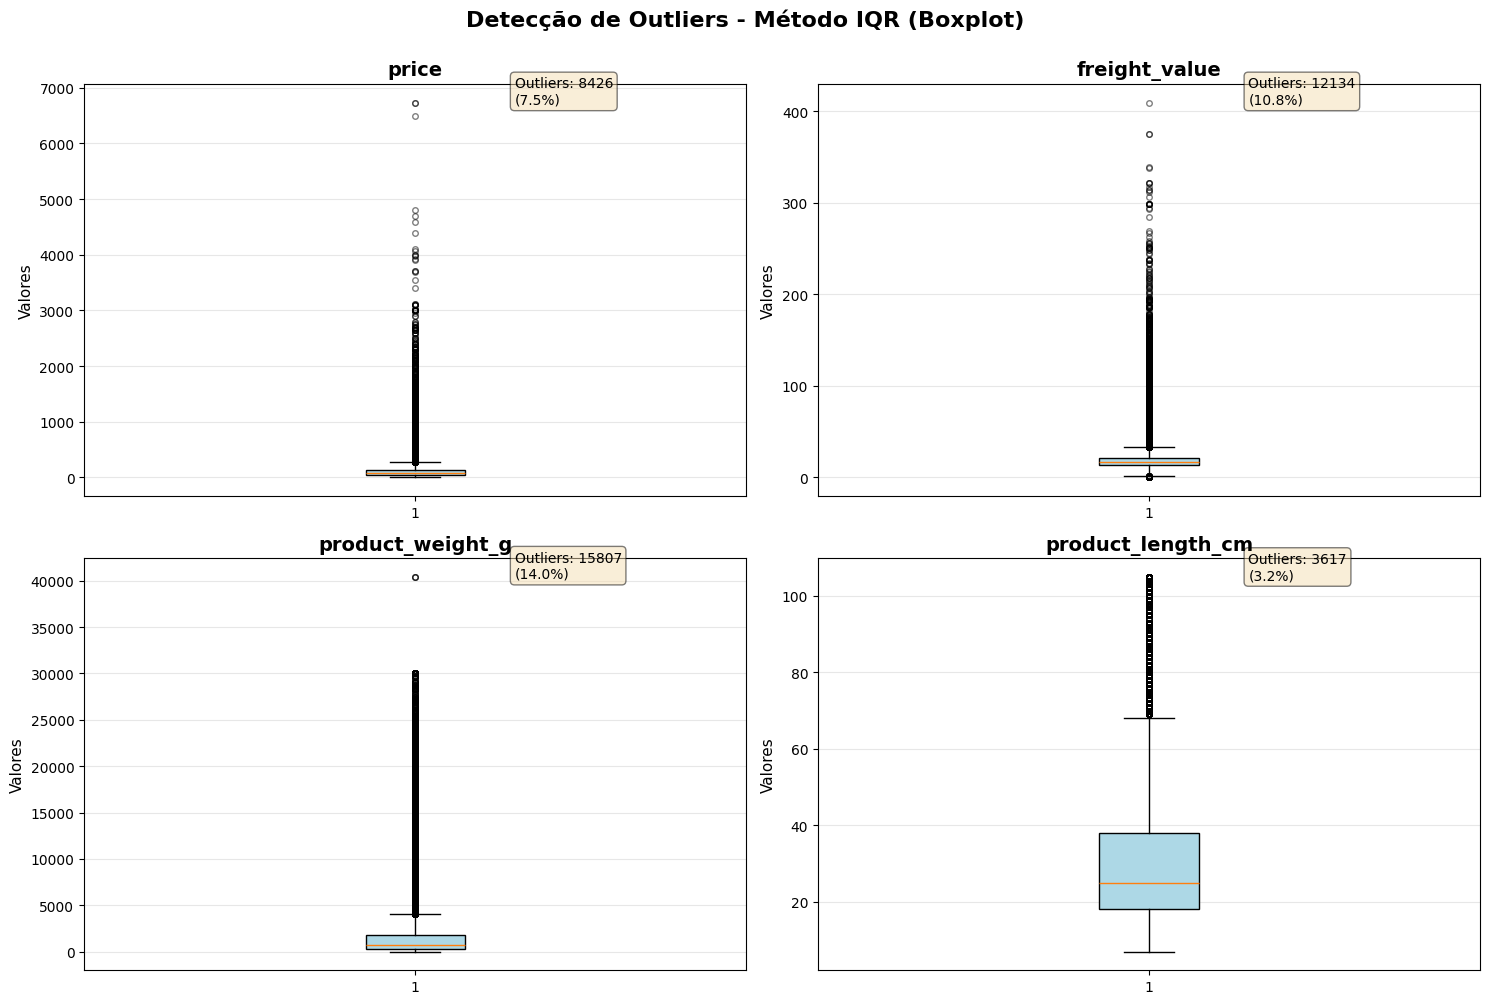

In [22]:
cols_principais = ['price', 'freight_value', 'product_weight_g', 'product_length_cm']

plt.figure(figsize=(15, 10))

for i, col in enumerate(cols_principais, 1):
    if col in df.columns:
        plt.subplot(2, 2, i)

        # Boxplot
        bp = plt.boxplot(df[col].dropna(), vert=True, patch_artist=True)

        for patch in bp['boxes']:
            patch.set_facecolor('lightblue')

        for flier in bp['fliers']:
            flier.set(marker='o', color='red', alpha=0.5, markersize=4)

        plt.title(f'{col}', fontsize=14, fontweight='bold')
        plt.ylabel('Valores', fontsize=11)
        plt.grid(axis='y', alpha=0.3)

        # Adicionar estatísticas
        resultado = resultados_iqr.get(col, {})
        if resultado:
            plt.text(1.15, plt.ylim()[1]*0.95,
                    f"Outliers: {resultado['quantidade']}\n({resultado['percentual']:.1f}%)",
                    fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Detecção de Outliers - Método IQR (Boxplot)',
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

Outliers - Preços:
Mesmo com essa quantidade toda de outliers, são valores validos e reais, nada de erros. Produtos caros fazem parte do e-commerce.

Ouliers - Fretes:
Os fretes altos está correlacionados a peso e volume, ou seja, produtos pesados e volumosos tendem a ter fretes mais caros. Remover distorceria análise de custo logístico.

Ouliers - Pesos:
Pesos variados são normais, como pode ter 2g (bijuterias) até 40kg (móveis).

Ouliers - Dimensões:
Essas dimensões extrema é possível, como um brinco, para um guarda-roupa. Impactando no cálculo de frete.


Com isso a melhor opção vai ser manter esses outliers pois são todos naturais.

In [23]:
#Tipos de dados
print("Tipos de dados do dataset: ")
print(df.dtypes)


Tipos de dados do dataset: 
order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm                 float64
dtype: object


Alguns dados possui tipos que não o correspondem, por exemplo: colunas que tratam datas.


In [24]:
# Tratamento no tipo de dados de determinadas colunas
# Colunas relacionadas a datas
# Após converte, ajuda a calcular tempo por exemplo
colunas_data = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'shipping_limit_date'
]

for col in colunas_data:
    df[col] = pd.to_datetime(df[col], errors='coerce') # Convertendo para datatime.

# Coluna de order_item_id sera inteiro, pois se trata apenas um, não existe e.5 itens por exemplo.
df['order_item_id'] = df['order_item_id'].astype('Int64') # Convertendo para inteiro,


In [25]:
print(df.dtypes)

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                             Int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
product_category_name                    object
product_name_lenght                     float64
product_description_lenght              float64
product_photos_qty                      float64
product_weight_g                        float64
product_length_cm                       float64
product_height_cm                       

In [26]:
df.shape

(112624, 22)

Total de categorias: 74
Categoria mais comum: cama_mesa_banho (11107 ocorrências)


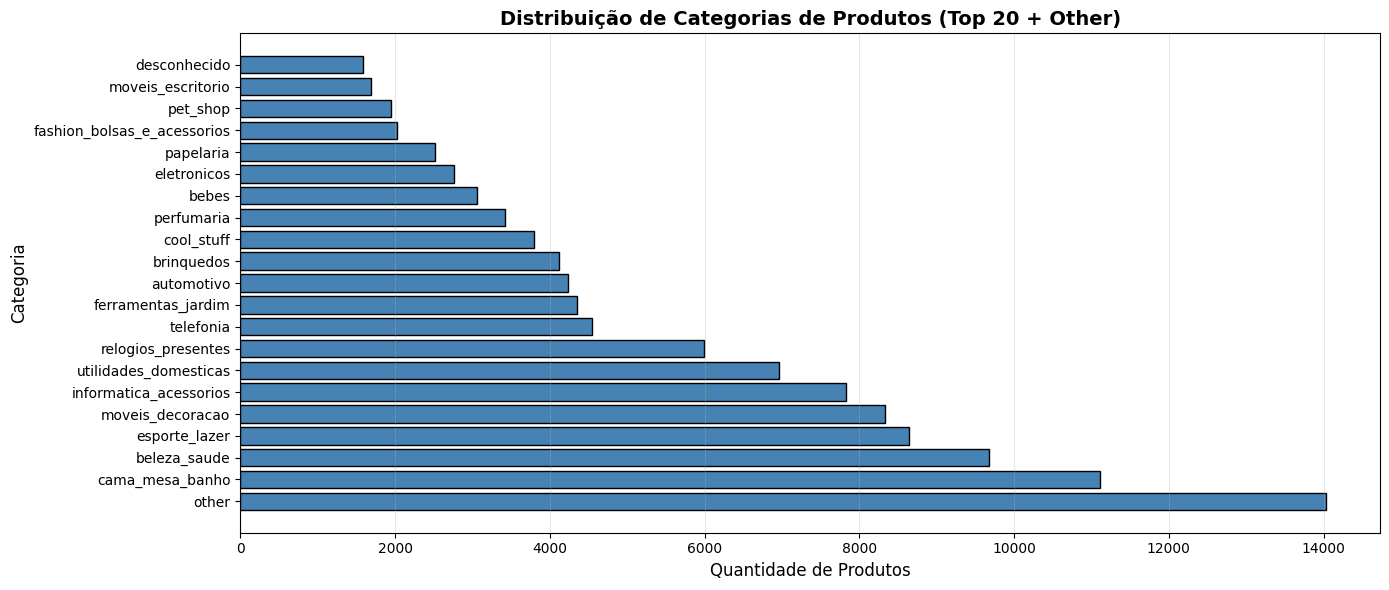

In [27]:
# Categorias raras | one hot enconding
# Machine Learning trabalha com números

cat = 'product_category_name'
print(f"Total de categorias: {df[cat].nunique()}")
print(f"Categoria mais comum: {df[cat].value_counts().index[0]} ({df[cat].value_counts().iloc[0]} ocorrências)")

# Manter apenas as 20 categorias mais frequentes
top = df[cat].value_counts().nlargest(20).index
df[cat] = df[cat].where(df[cat].isin(top), 'other') # Caso não não esteja entre o top 20, sera tratada como outros.


plt.figure(figsize=(14, 6))

# Contar frequências
cat_counts = df[cat].value_counts()

# Gráfico de barras
plt.barh(range(len(cat_counts)), cat_counts.values, color='steelblue', edgecolor='black')
plt.yticks(range(len(cat_counts)), cat_counts.index, fontsize=10)
plt.xlabel('Quantidade de Produtos', fontsize=12)
plt.ylabel('Categoria', fontsize=12)
plt.title('Distribuição de Categorias de Produtos (Top 20 + Other)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [28]:
# Motivos de manter apenas as 20 categorias frequentes:
# One-Hot Encoding direto criaria 50+ colunas
# Categorias raras aparecem poucas vezes, com isso serão tratadas como outros
# colunas vão ficar assim cat_categoria etc...
# drop_first=False para manter todas as colunas
df = pd.get_dummies(df, columns=[cat], prefix='cat', drop_first=False) # transformação em coluna binárias.

# Verificar colunas criadas
colunas_criadas = [col for col in df.columns if col.startswith('cat_')]
print(f"Colunas binárias criadas: {len(colunas_criadas)}")
print(f"Shape do dataset: {df.shape[0]} linhas × {df.shape[1]} colunas")

colunas_exemplo = ['price', 'freight_value'] + colunas_criadas[:3]
print(df[colunas_exemplo].head())

Colunas binárias criadas: 21
Shape do dataset: 112624 linhas × 42 colunas
    price  freight_value  cat_automotivo  cat_bebes  cat_beleza_saude
0   29.99           8.72           False      False             False
1  118.70          22.76           False      False             False
2  159.90          19.22            True      False             False
3   45.00          27.20           False      False             False
4   19.90           8.72           False      False             False


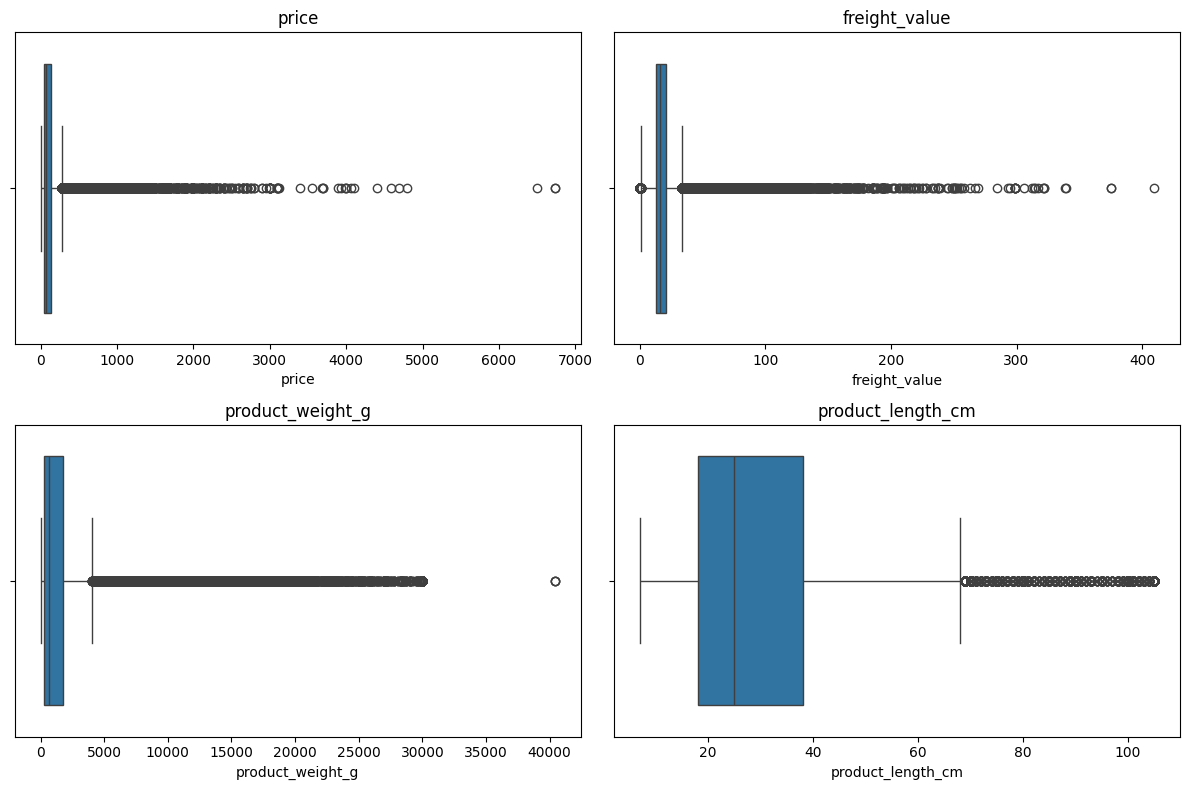

In [29]:
# Boxplot
plt.figure(figsize=(12, 8))

cols = ['price', 'freight_value', 'product_weight_g', 'product_length_cm']

for i, col in enumerate(cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [30]:
# Normalização - StandardScaler(Z-score)
# Normalização garante tratamento justo de todas as variáveis
# Variáveis em escalas diferentes prejudicam algoritmos
# Variáveis em escalas diferentes (peso: 40.000g, preço: R$6.735)")
from sklearn.preprocessing import StandardScaler
print(df.columns.tolist())
col_numericas = [
    'price','freight_value','product_weight_g','product_length_cm',
    'product_height_cm','product_width_cm'
]
# z = (x - média) / desvio_padrão
scaler = StandardScaler()
df_normalizado = df.copy() # copia do dataset, para não alterar no original.
df_normalizado[col_numericas] = scaler.fit_transform(df_normalizado[col_numericas])

df_normalizado[col_numericas].head()

['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'cat_automotivo', 'cat_bebes', 'cat_beleza_saude', 'cat_brinquedos', 'cat_cama_mesa_banho', 'cat_cool_stuff', 'cat_desconhecido', 'cat_eletronicos', 'cat_esporte_lazer', 'cat_fashion_bolsas_e_acessorios', 'cat_ferramentas_jardim', 'cat_informatica_acessorios', 'cat_moveis_decoracao', 'cat_moveis_escritorio', 'cat_other', 'cat_papelaria', 'cat_perfumaria', 'cat_pet_shop', 'cat_relogios_presentes', 'cat_telefonia', 'cat_utilidades_domesticas']


,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,-0.493873,-0.712992,-0.424829,-0.690461,-0.639196,-0.853817
1,-0.010628,0.175170,-0.451484,-0.690461,-0.267275,-0.341324
2,0.213808,-0.048768,-0.446153,-0.380940,0.179030,-0.170493
3,-0.412106,0.456042,-0.438157,-0.009513,-0.490428,-0.255909
4,-0.548838,-0.712992,-0.491466,1.290478,-0.118507,-0.682986


Normalizando para media 0 e desvio padrão 1.

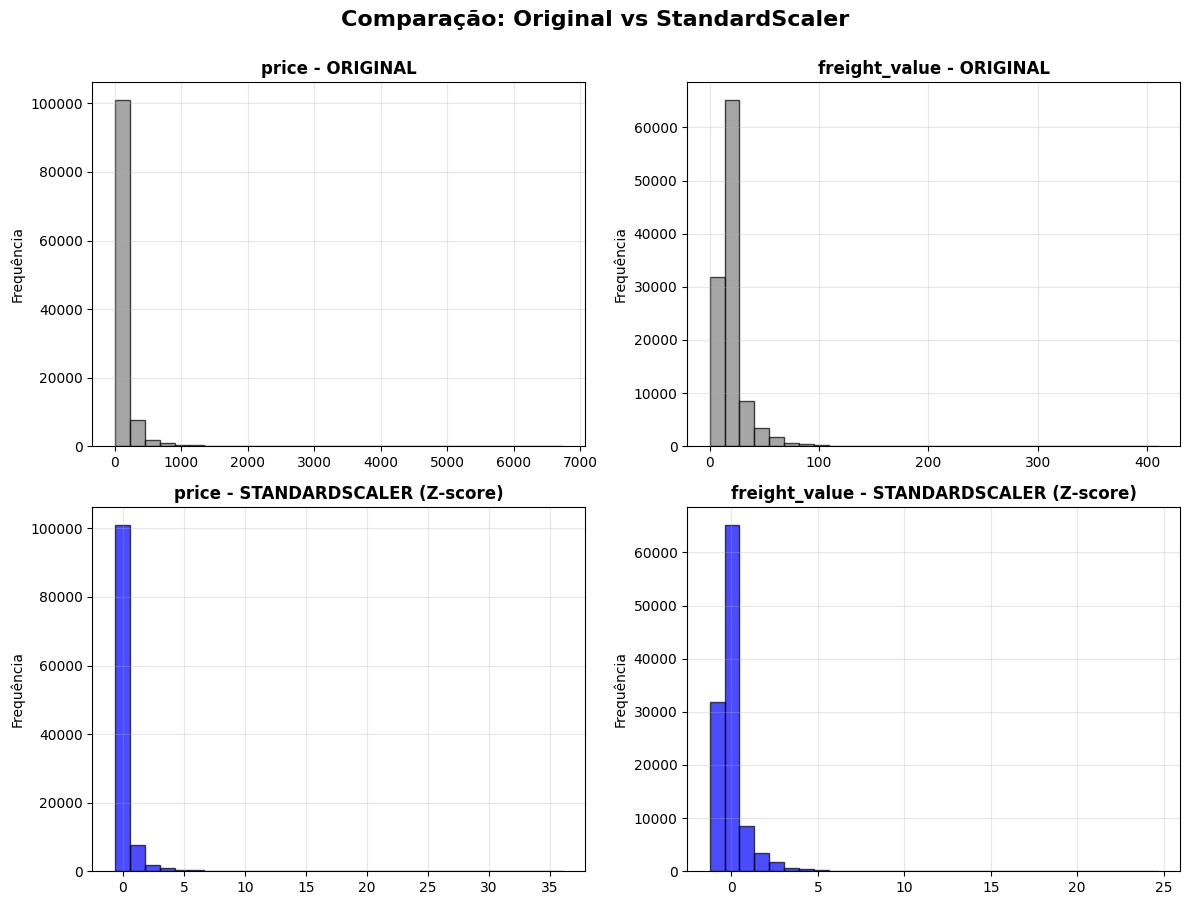

In [31]:
# Visualização comparativa
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

colunas_viz = ['price', 'freight_value']

for i, col in enumerate(colunas_viz):
    # Original
    axes[0, i].hist(df[col].dropna(), bins=30, alpha=0.7, color='gray', edgecolor='black')
    axes[0, i].set_title(f'{col} - ORIGINAL', fontweight='bold')
    axes[0, i].set_ylabel('Frequência')
    axes[0, i].grid(alpha=0.3)

    # StandardScaler
    axes[1, i].hist(df_normalizado[col].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
    axes[1, i].set_title(f'{col} - STANDARDSCALER (Z-score)', fontweight='bold')
    axes[1, i].set_ylabel('Frequência')
    axes[1, i].grid(alpha=0.3)

plt.suptitle('Comparação: Original vs StandardScaler',
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [32]:
# Ver estatísticas Antes
print("Antes padronização:")
print(df[col_numericas].describe())

# Ver estatísticas Depois
print("\nDepois da padronização:")
print(df_normalizado[col_numericas].describe())

Antes padronização:
               price  freight_value  product_weight_g  product_length_cm  \
count  112624.000000  112624.000000     112624.000000      112624.000000   
mean      120.650991      19.990920       2093.820766          30.153679   
std       183.572417      15.807996       3751.688625          16.154023   
min         0.850000       0.000000          2.000000           7.000000   
25%        39.900000      13.080000        300.000000          18.000000   
50%        74.990000      16.260000        700.000000          25.000000   
75%       134.900000      21.150000       1800.000000          38.000000   
max      6735.000000     409.680000      40425.000000         105.000000   

       product_height_cm  product_width_cm  
count      112624.000000     112624.000000  
mean           16.593168         22.996049  
std            13.443774         11.707535  
min             2.000000          6.000000  
25%             8.000000         15.000000  
50%            13.000000 

In [33]:
# Seleção de Atributos
# VARIANCE THRESHOLD
# Remover variáveis com baixa variância: valores muitos parecidos.
# Se uma variável não varia, ela não ajuda a distinguir casos")
# Exemplo: coluna com 99% de zeros não tem informação útil
from sklearn.feature_selection import VarianceThreshold

numeric = df_normalizado.select_dtypes(include=['float64','int64']).fillna(0)
selector = VarianceThreshold(threshold=0.01)
selector.fit(numeric)
print(f"\n Quantidade de {numeric.shape[1]} colunas numéricas.")
kept = numeric.columns[selector.get_support()]
removed = [c for c in numeric.columns if c not in kept]


print(f"Threshold usado: 0.01 (1%)")
print(f"Colunas mantidas: {len(kept)}")
print(f"colunas removidas: {len(removed)}")


 Quantidade de 10 colunas numéricas.
Threshold usado: 0.01 (1%)
Colunas mantidas: 10
colunas removidas: 0


Conclusão: Todas as variáveis têm variação suficiente, significando que não há colunas 'mortas' no data set.

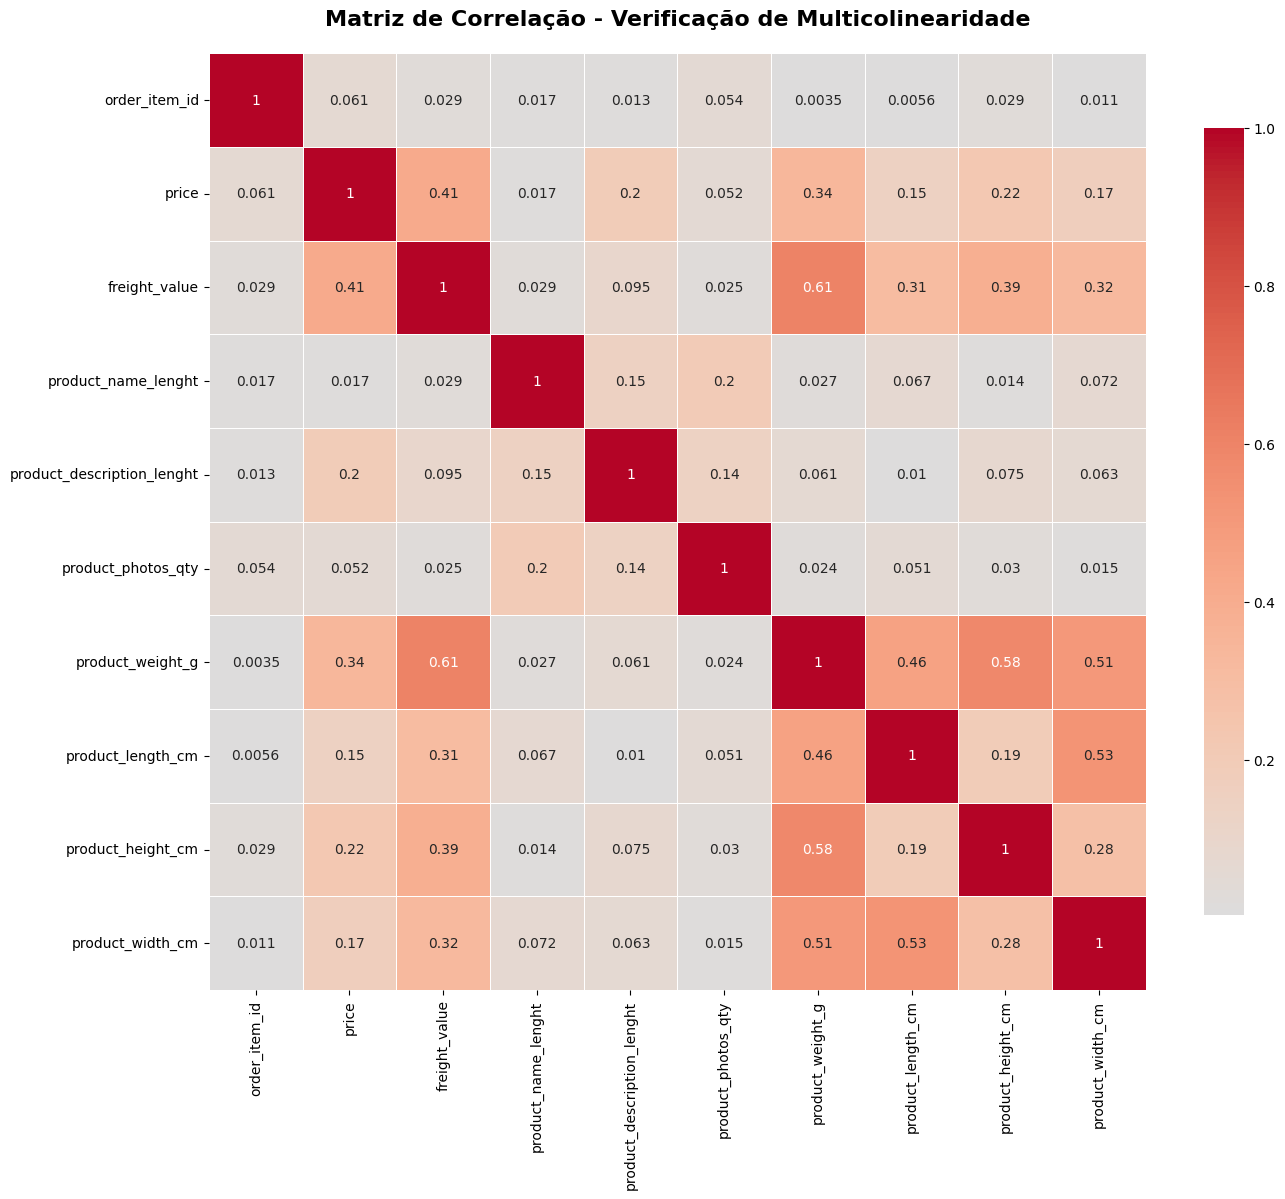

Variáveis com colinearidade alta: []


In [34]:
# Correlação
# duas variaveis que dizem a mesma coisa.
# descarta correlação acima de 0.90
corr = numeric.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.90)]


plt.figure(figsize=(14, 12))
sns.heatmap(corr,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Verificação de Multicolinearidade',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("Variáveis com colinearidade alta:", to_drop)

Se uma variável não varia, ela não ajuda o modelo a aprender nada.

 Resultado: As variaveis são independentes entre sí, trazendo informação única.

In [35]:
# Filtros Simples
# Remoção de colunas que não vai impactar em nada
# IDs
# IDs não agregam informação preditiva
colunas_remover = [
    'order_id',
    'customer_id',
    'product_id',
    'seller_id',
    'order_item_id'
]


colunas_existentes = [c for c in colunas_remover if c in df.columns]
df_filtrado = df.drop(columns=colunas_existentes)

print(f"Dataset: {df.shape[1]} - {df_filtrado.shape[1]} colunas")
print(f"Colunas removidas: {len(colunas_existentes)}")
print(colunas_existentes)

Dataset: 42 - 37 colunas
Colunas removidas: 5
['order_id', 'customer_id', 'product_id', 'seller_id', 'order_item_id']


In [36]:
# Features
# Dias de atraso na entrega
df['delivery_delay_days'] = (
    df['order_delivered_customer_date'] - df['order_estimated_delivery_date']
).dt.days

# Estatísticas
nao_nulos = df['delivery_delay_days'].notna().sum()
atrasados = (df['delivery_delay_days'] > 0).sum()
no_prazo = (df['delivery_delay_days'] <= 0).sum()

print(f"Pedidos com data de entrega: {nao_nulos}")
print(f"Pedidos atrasados (>0 dias): {atrasados} ({(atrasados/nao_nulos)*100:.1f}%)")
print(f"Pedidos no prazo (≤0 dias): {no_prazo} ({(no_prazo/nao_nulos)*100:.1f}%)")
print(f"Atraso médio: {df[df['delivery_delay_days']>0]['delivery_delay_days'].mean():.1f} dias")
print(f"Atraso máximo: {df['delivery_delay_days'].max():.0f} dias")


Pedidos com data de entrega: 110170
Pedidos atrasados (>0 dias): 7265 (6.6%)
Pedidos no prazo (≤0 dias): 102905 (93.4%)
Atraso médio: 10.5 dias
Atraso máximo: 188 dias


Medir se houve atraso e o quanto ele ultrapassou a previsão estimada pela plataforma.

valor > 0 - entrega atrasada

valor ≤ 0 - entregue no prazo

In [37]:
# Proporção do frete em relação ao preço do produto
# Valor alto: frete representa grande parte do custo
# Valor baixo: frete é pequeno comparado ao produto
df['freight_ratio'] = df['freight_value'] / df['price']

print(f"Média: {df['freight_ratio'].mean():.2f} ({df['freight_ratio'].mean()*100:.0f}%)")
print(f"Mediana: {df['freight_ratio'].median():.2f} ({df['freight_ratio'].median()*100:.0f}%)")
print(f"Mínimo: {df['freight_ratio'].min():.2f}")
print(f"Máximo: {df['freight_ratio'].max():.2f}")

alto_frete = (df['freight_ratio'] > 0.5).sum()
print(f"\n Produtos com frete > 50% do preço: {alto_frete} ({(alto_frete/len(df))*100:.1f}%)")


Média: 0.32 (32%)
Mediana: 0.23 (23%)
Mínimo: 0.00
Máximo: 26.24

 Produtos com frete > 50% do preço: 18933 (16.8%)


Ajuda a explicar baixa satisfação em produtos baratos com frete caro.

In [38]:
# Correlacionar volume com custo de frete
df['product_volume_cm3'] = (
    df['product_length_cm'] *
    df['product_height_cm'] *
    df['product_width_cm']
)

print(f"Média: {df['product_volume_cm3'].mean():,.0f} cm³")
print(f"Mediana: {df['product_volume_cm3'].median():,.0f} cm³")
print(f"Mínimo: {df['product_volume_cm3'].min():,.0f} cm³")
print(f"Máximo: {df['product_volume_cm3'].max():,.0f} cm³")
# Frete depende tanto do peso quanto do volume
# Permite identificar produtos grandes mas leves
# Ou produtos pequenos mas pesados.

Média: 15,243 cm³
Mediana: 6,480 cm³
Mínimo: 168 cm³
Máximo: 296,208 cm³


Porque o frete não depende apenas do peso, deve contar tambem com o volume do pacote.

In [39]:
# Semelhante a de dias, porem essa trata com 1 ou 0
df['delivered_late'] = (df['delivery_delay_days'] > 0).astype(int)

# Versão binária do atraso: pedido atrasou ou não?
total_com_entrega = df['delivered_late'].notna().sum()
atrasados = df['delivered_late'].sum()

print(f"Total de pedidos entregues: {total_com_entrega}")
print(f"Pedidos atrasados 1: {atrasados} ({(atrasados/total_com_entrega)*100:.1f}%)")
print(f"Pedidos no prazo 0: {total_com_entrega - atrasados} ({((total_com_entrega-atrasados)/total_com_entrega)*100:.1f}%)")

Total de pedidos entregues: 112624
Pedidos atrasados 1: 7265 (6.5%)
Pedidos no prazo 0: 105359 (93.5%)


1 - pedido atrasou
2 - pedido chegou no prazo

In [40]:
# Pedido foi enviado para a transportadora?
# Se sim = true.
# Se não = false.
df['order_sent'] = df['order_delivered_carrier_date'].notna()  # 111430 True, 1194 False

enviados = df['order_sent'].sum()
nao_enviados = (~df['order_sent']).sum()

print(f"Pedidos enviados True: {enviados} ({(enviados/len(df))*100:.1f}%)")
print(f"Pedidos não enviados False: {nao_enviados} ({(nao_enviados/len(df))*100:.1f}%)")


Pedidos enviados True: 111430 (98.9%)
Pedidos não enviados False: 1194 (1.1%)


In [41]:
# Semelhante a de dias, porem essa trata com 1 ou 0
# Trata se o pedido foi entregue ao cliente
# True que dizer que o pedido entregue
# False fala se o pedido não entregue ainda
df['delivered'] = df['order_delivered_customer_date'].notna()

entregues = df['delivered'].sum()
nao_entregues = (~df['delivered']).sum()

print(f"Pedidos entregues (True): {entregues} ({(entregues/len(df))*100:.1f}%)")
print(f"Pedidos não entregues (False): {nao_entregues} ({(nao_entregues/len(df))*100:.1f}%)")

Pedidos entregues (True): 110170 (97.8%)
Pedidos não entregues (False): 2454 (2.2%)


0 - pedido atrasou
1 - pedido chegou no prazo

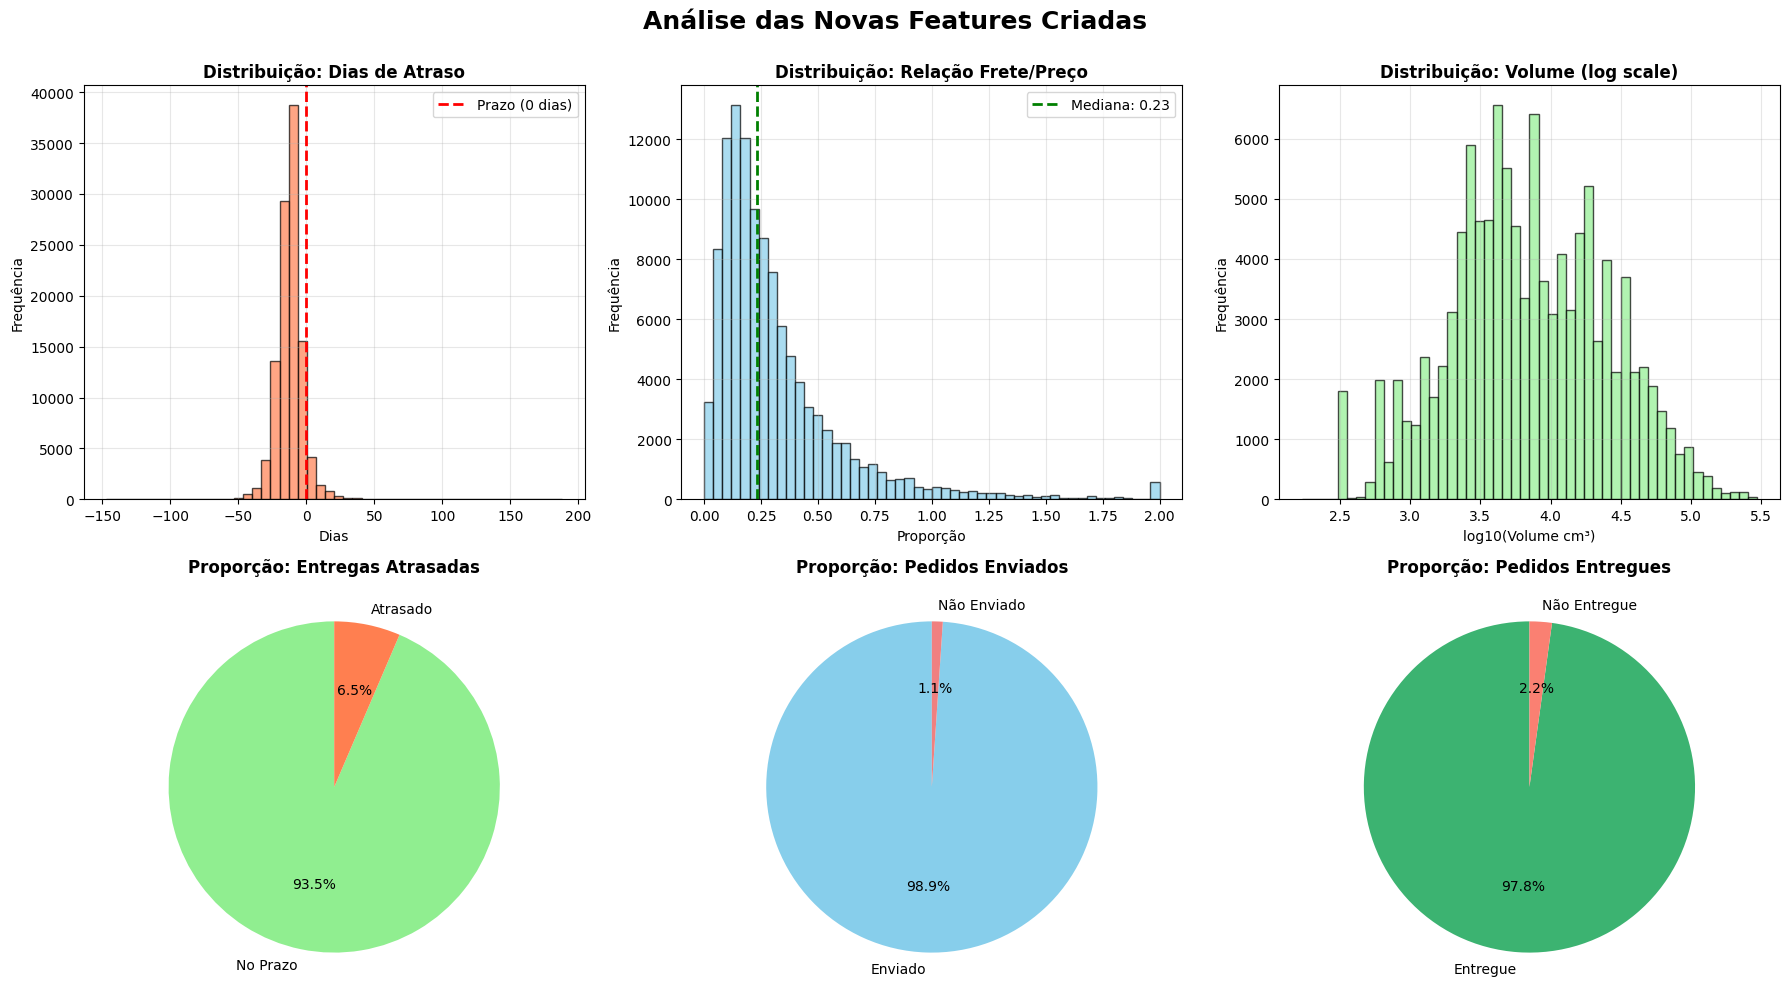

In [42]:
# Visualização das novas features

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Distribuição de atrasos
axes[0, 0].hist(df[df['delivery_delay_days'].notna()]['delivery_delay_days'],
                bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(0, color='red', linestyle='--', linewidth=2, label='Prazo (0 dias)')
axes[0, 0].set_title('Distribuição: Dias de Atraso', fontweight='bold')
axes[0, 0].set_xlabel('Dias')
axes[0, 0].set_ylabel('Frequência')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Relação frete/preço
axes[0, 1].hist(df['freight_ratio'].clip(0, 2), bins=50,
                color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(df['freight_ratio'].median(), color='green',
                   linestyle='--', linewidth=2, label=f'Mediana: {df["freight_ratio"].median():.2f}')
axes[0, 1].set_title('Distribuição: Relação Frete/Preço', fontweight='bold')
axes[0, 1].set_xlabel('Proporção')
axes[0, 1].set_ylabel('Frequência')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Volume do produto (log scale)
axes[0, 2].hist(np.log10(df['product_volume_cm3']+1), bins=50,
                color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Distribuição: Volume (log scale)', fontweight='bold')
axes[0, 2].set_xlabel('log10(Volume cm³)')
axes[0, 2].set_ylabel('Frequência')
axes[0, 2].grid(alpha=0.3)

# Entrega atrasada (pie chart)
atrasados_counts = df['delivered_late'].value_counts()
axes[1, 0].pie(atrasados_counts, labels=['No Prazo', 'Atrasado'],
               autopct='%1.1f%%', colors=['lightgreen', 'coral'], startangle=90)
axes[1, 0].set_title('Proporção: Entregas Atrasadas', fontweight='bold')

# Pedidos enviados (pie chart)
enviados_counts = df['order_sent'].value_counts()
axes[1, 1].pie(enviados_counts, labels=['Enviado', 'Não Enviado'],
               autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
axes[1, 1].set_title('Proporção: Pedidos Enviados', fontweight='bold')

# 6. Pedidos entregues (pie chart)
entregues_counts = df['delivered'].value_counts()
axes[1, 2].pie(entregues_counts, labels=['Entregue', 'Não Entregue'],
               autopct='%1.1f%%', colors=['mediumseagreen', 'salmon'], startangle=90)
axes[1, 2].set_title('Proporção: Pedidos Entregues', fontweight='bold')

plt.suptitle('Análise das Novas Features Criadas', fontsize=18, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [43]:
print("PIPELINE COMPLETO - RESUMO DO PROCESSO")
print("\n")

print("""
FLUXOGRAMA DO PROCESSO:

1. CARREGAMENTO -> 3 datasets unidos
2. EXPLORAÇÃO -> EDA, correlações, estatísticas
3. LIMPEZA -> Duplicatas, inconsistências, nulos, outliers
4. CONVERSÃO -> Tipos de dados corretos
5. CATEGORIZAÇÃO -> Agrupamento + One-Hot Encoding
6. NORMALIZAÇÃO -> StandardScaler
7. SELEÇÃO -> Remoção de IDs
8. FEATURE ENGINEERING -> 6 novas features
9. EXPORTAÇÃO -> Datasets finais (Tratados e Normalizados)

Dataset: 113.425 -> 112.624 registros
Colunas: 22 -> 42
""")

PIPELINE COMPLETO - RESUMO DO PROCESSO



FLUXOGRAMA DO PROCESSO:

1. CARREGAMENTO -> 3 datasets unidos
2. EXPLORAÇÃO -> EDA, correlações, estatísticas
3. LIMPEZA -> Duplicatas, inconsistências, nulos, outliers
4. CONVERSÃO -> Tipos de dados corretos
5. CATEGORIZAÇÃO -> Agrupamento + One-Hot Encoding
6. NORMALIZAÇÃO -> StandardScaler
7. SELEÇÃO -> Remoção de IDs
8. FEATURE ENGINEERING -> 6 novas features
9. EXPORTAÇÃO -> Datasets finais (Tratados e Normalizados)

Dataset: 113.425 -> 112.624 registros
Colunas: 22 -> 42 



In [44]:

df_normalizado.shape

(112624, 42)

In [45]:
# Dataset tratado final
df.to_csv("olist_tratado.csv")


In [46]:
# Dataset normalizado
df_normalizado.to_csv("olist_normalizado.csv")
